# Importing libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
n_samples = len(digits.images)
features = digits.images.reshape((n_samples, -1))

# Train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split( features, digits.target, test_size = 0.3,stratify = digits.target, random_state = 123 )

# KNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
error_rate = []
for i in range(1,40) :
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test))

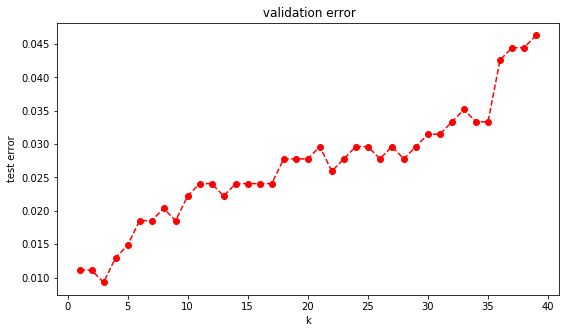

In [9]:
fig, ax = plt.subplots(figsize = (9,5)) 
ax.plot(range(1,40), error_rate, color = 'red', linestyle = '--' , marker = 'o' ) 
ax.set(xlabel = 'k', ylabel = 'test error', title = ' validation error') 
plt.show()

Hence, we choose knn = 4

In [10]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [11]:
model_knn = knn.fit(X_train, y_train)

In [12]:
y_pred = knn.predict(X_test)

### checking accuracy score, classification report and confusion matrix

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
print(accuracy_score(y_test, y_pred))

0.9851851851851852


In [48]:
accuracy_knn = accuracy_score(y_test, y_pred)

In [62]:
cnf =confusion_matrix(y_test,y_pred)

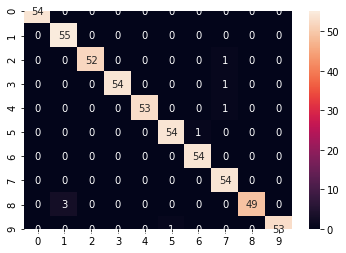

In [63]:
sns.heatmap(cnf, annot = True, fmt = 'g' )

In [16]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       1.00      0.94      0.97        52
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



# Naive Bayes Model

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
gnb = GaussianNB()

In [19]:
model_gnb = gnb.fit(X_train, y_train)

In [20]:
y_pred1 = gnb.predict(X_test)

### checking accuracy score, classification report and confusion matrix

In [21]:
print(accuracy_score(y_test, y_pred1 ))

0.8351851851851851


In [49]:
accuracy_gnb = accuracy_score(y_test, y_pred1)

In [64]:
cnf1 = confusion_matrix(y_test,y_pred1)

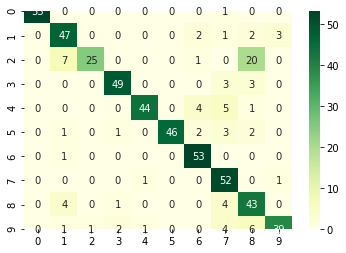

In [65]:
sns.heatmap(cnf1, annot = True, cmap = 'YlGn')

In [24]:
print(classification_report(y_test, y_pred1 ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.77      0.85      0.81        55
           2       0.96      0.47      0.63        53
           3       0.92      0.89      0.91        55
           4       0.96      0.81      0.88        54
           5       1.00      0.84      0.91        55
           6       0.85      0.98      0.91        54
           7       0.71      0.96      0.82        54
           8       0.56      0.83      0.67        52
           9       0.91      0.72      0.80        54

    accuracy                           0.84       540
   macro avg       0.86      0.83      0.83       540
weighted avg       0.87      0.84      0.83       540



# SVM

In [25]:
from sklearn import svm

In [26]:
clf = svm.SVC(kernel = 'linear')

In [27]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred2 = clf.predict(X_test)

### checking accuracy score , classification report and confusion matrix

In [30]:
print(accuracy_score(y_test, y_pred2 ))

0.9814814814814815


In [50]:
accuracy_clf = accuracy_score(y_test, y_pred2 )

In [67]:
cnf2 = confusion_matrix(y_test,y_pred2)

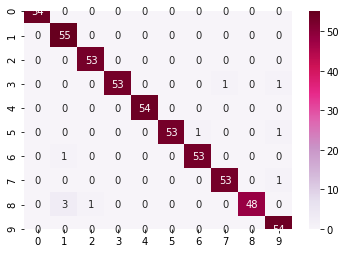

In [70]:
sns.heatmap(cnf2, annot = True, cmap = 'PuRd')

In [32]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       1.00      0.94      0.97        52
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_dt = DecisionTreeClassifier(random_state =1)

In [35]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [37]:
y_pred3 = model_dt.predict(X_test)

### checking accuracy score, classification report and confusion matrix

In [38]:
print(accuracy_score(y_test, y_pred3 ))

0.8555555555555555


In [51]:
accuracy_decisionTree = accuracy_score(y_test, y_pred3 )

In [71]:
cnf3 = confusion_matrix(y_test, y_pred3 )

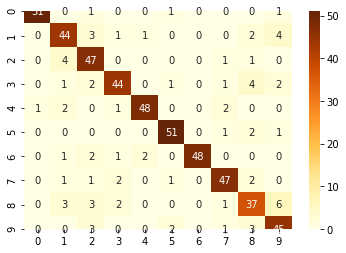

In [73]:
sns.heatmap(cnf3, annot = True, cmap = 'YlOrBr')

In [40]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.79      0.80      0.79        55
           2       0.76      0.89      0.82        53
           3       0.86      0.80      0.83        55
           4       0.94      0.89      0.91        54
           5       0.91      0.93      0.92        55
           6       1.00      0.89      0.94        54
           7       0.87      0.87      0.87        54
           8       0.73      0.71      0.72        52
           9       0.76      0.83      0.80        54

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540



# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RF = RandomForestClassifier(n_estimators=100, random_state = 1)

In [43]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
y_pred4 = RF.predict(X_test)

### checking accuracy score, classification report and confusion matrix

In [45]:
print(accuracy_score(y_test, y_pred4 ))

0.987037037037037


In [52]:
accuracy_rf = accuracy_score(y_test, y_pred4 )

In [74]:
cnf4 = confusion_matrix(y_test, y_pred4 )

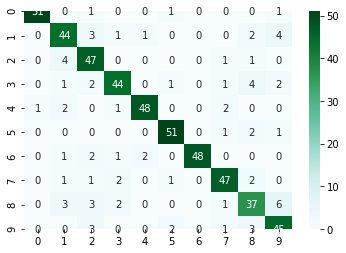

In [75]:
sns.heatmap(cnf3, annot = True, cmap = 'BuGn')

In [47]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       0.98      0.98      0.98        54
           5       1.00      0.96      0.98        55
           6       0.98      0.98      0.98        54
           7       0.96      0.98      0.97        54
           8       0.98      0.98      0.98        52
           9       0.98      1.00      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



# Data Visualization

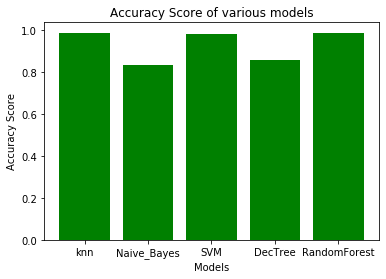

In [92]:
y = [accuracy_knn,accuracy_gnb,accuracy_clf,accuracy_decisionTree,accuracy_rf]
X = ['knn','Naive_Bayes','SVM','DecTree','RandomForest']
plt.bar(X,y,color='g',linewidth =4.0)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of various models')
plt.show()